In [68]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set_style('darkgrid')

In [3]:
red_df = pd.read_csv(r'winequality-red.csv', sep = ";")
white_df = pd.read_csv(r'winequality-white.csv', sep = ';')

### Asseisng Data

In [12]:
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [13]:
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
red_df.shape

(1599, 12)

In [5]:
white_df.shape

(4898, 12)

In [6]:
red_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
white_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
white_df.duplicated().sum()

937

In [9]:
red_df.duplicated().sum()

240

In [10]:
white_df.quality.nunique()

7

In [11]:
red_df.quality.nunique()

6

In [14]:
# Creating Color Columns
color_red = np.repeat('red', red_df.shape[0])
color_white = np.repeat('white', white_df.shape[0])
red_df['color'] = color_red
white_df['color'] = color_white

In [16]:
# Comining the 2 dataframes to df
red_df.rename(columns={'total_sulfur-dioxide':'total_sulfur_dioxide'}, inplace = True)
df = red_df.append(white_df)

In [18]:
# EDA with Visuals

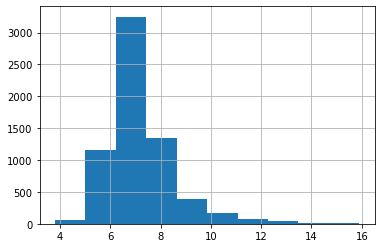

In [24]:
df['fixed acidity'].hist()

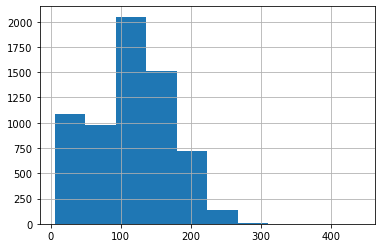

In [25]:
df['total sulfur dioxide'].hist()


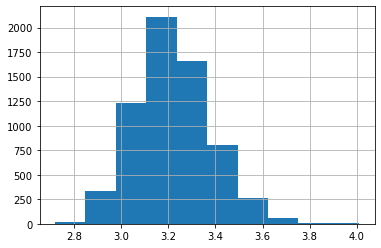

In [26]:
df['pH'].hist()


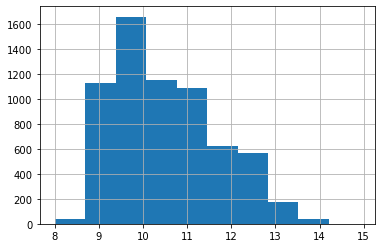

In [27]:
df['alcohol'].hist()


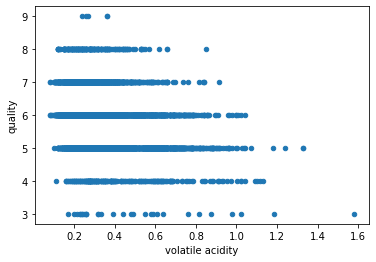

In [28]:
df.plot(x="volatile acidity", y="quality", kind="scatter")


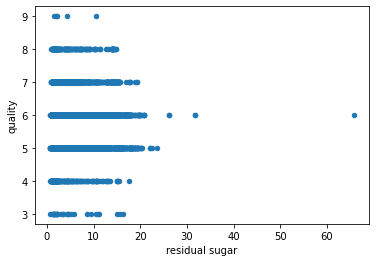

In [30]:
df.plot(x="residual sugar", y="quality", kind="scatter")


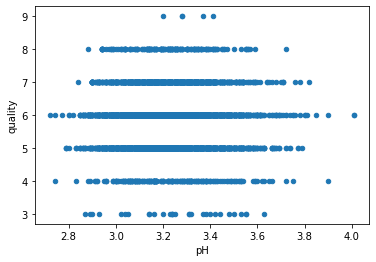

In [31]:
df.plot(x="pH", y="quality", kind="scatter")


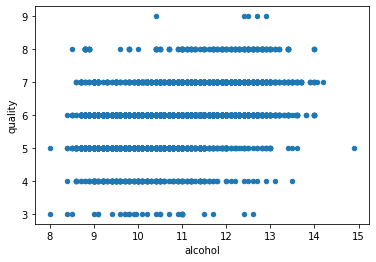

In [32]:
df.plot(x="alcohol", y="quality", kind="scatter")


### Drawign Conclusions

In [34]:
# Is a certain type of wine associated with higher quality?

In [35]:
df.groupby('color').mean().quality

color
red      5.636023
white    5.877909
Name: quality, dtype: float64

In [36]:
df.groupby('color').mean().quality

color
red      5.636023
white    5.877909
Name: quality, dtype: float64

In [37]:
# What level of acidity receives the highest average rating?

In [38]:
df.describe().pH

count    6497.000000
mean        3.218501
std         0.160787
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64

In [40]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [2.72, 3.11, 3.21, 3.32, 4.01] # That'is filled with the outpot of the previous code
bin_names = ['high', 'mod_high', 'medium', 'low'] 

In [41]:
# creating acidity level column
df['acidity levels'] = pd.cut(df['pH'], bin_edges, labels = bin_names)
print (df.groupby('acidity levels').mean().quality)

acidity levels
high        5.783343
mod_high    5.784540
medium      5.850832
low         5.859593
Name: quality, dtype: float64


In [42]:
# Do wines with higher alcoholic content receive better ratings?

In [43]:
df.alcohol.median()
low_alcohol = df.query('alcohol < 10.3')
high_alcohol = df.query('alcohol >= 10.3')
num_samples = df.shape[0]
num_samples == low_alcohol['quality'].count() + high_alcohol['quality'].count()

True

In [64]:
# What level of acidity receives the highest average rating?

Text(0, 0.5, 'Quality')

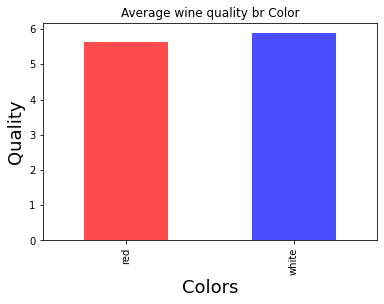

In [67]:
colors = ['red', 'blue']
color_means = df.groupby('color')['quality'].mean()
color_means.plot(kind='bar', title = 'Average wine quality br Color', color=colors, alpha=.7)
plt.xlabel("Colors", fontsize=18)
plt.ylabel('Quality', fontsize=18)

In [71]:
# Do wines with higher alcoholic content receive better ratings?

In [69]:
median = df['alcohol'].median()
low = df.query('alcohol < {}'.format(median))
high = df.query('alcohol >= {}'.format(median))

mean_quality_low = low['quality'].mean()
mean_quality_high = high['quality'].mean()

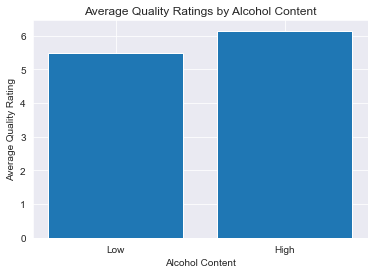

In [70]:
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Rating');

In [72]:
# Do sweeter wines receive higher ratings?